In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [144]:
pd.options.display.float_format = '{:,.2f}'.format
data = pd.read_csv('/Users/Matthew/Documents/Documents/Python/PUBG_kaggle-master/train_V2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [145]:
#Let's look at the top 5 records to see what the data might look like
data.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.00,0,0.00,0,0,244.80,1,1466,0.44
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.00,0,11.04,0,0,"1,434.00",5,0,0.64
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.00,0,0.00,0,0,161.80,2,0,0.78
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.00,0,0.00,0,0,202.70,3,0,0.17
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.00,0,0.00,0,0,49.75,2,0,0.19


In [146]:
#Get rid of spaces in variable names and look at last 5 records
data.columns = [c.replace(' ', '_') for c in data.columns]
data.tail(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,"1,292.00",0,0.00,0,0,"1,019.00",3,1507,0.18
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.00,0,0.00,0,0,81.70,6,0,0.29
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.00,0,2.18,0,0,788.70,4,0,0.48
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.00,0,0.00,0,0,"2,748.00",8,0,0.80
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,"1,369.00",0,0.00,0,0,"1,244.00",5,0,0.55


In [147]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,"4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00",...,"4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,965.00"
mean,0.23,1.11,130.72,0.66,0.23,1.37,47.60,505.01,0.92,0.54,...,0.16,606.12,0.00,4.51,0.02,0.01,"1,154.22",3.66,606.46,0.47
std,0.59,1.72,170.78,1.15,0.60,2.68,27.46,627.50,1.56,0.71,...,0.47,"1,498.34",0.07,30.50,0.17,0.09,"1,183.50",2.46,739.70,0.31
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,24.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,155.10,2.00,0.00,0.20
50%,0.00,0.00,84.24,0.00,0.00,0.00,47.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,685.60,3.00,0.00,0.46
75%,0.00,2.00,186.00,1.00,0.00,2.00,71.00,"1,172.00",1.00,1.00,...,0.00,0.19,0.00,0.00,0.00,0.00,"1,976.00",5.00,"1,495.00",0.74
max,22.00,33.00,"6,616.00",53.00,64.00,80.00,101.00,"2,170.00",72.00,20.00,...,39.00,"40,710.00",18.00,"3,823.00",12.00,5.00,"25,780.00",236.00,"2,013.00",1.00


In [148]:
t='weaponsAcquired'
kill_dist=data.groupby(t)[t]
kill_dist.count()

weaponsAcquired
0      226578
1      580951
2      768836
3      768347
4      689622
5      540721
6      369549
7      226776
8      128698
9       68479
10      35642
11      18022
12       9388
13       4707
14       2831
15       1414
16       1088
17        622
18        640
19        402
20        491
21        322
22        331
23        212
24        306
25        192
26        214
27        136
28        177
29        125
        ...  
67          3
68          3
69          2
70          6
71          1
72          4
73          3
74          1
75          1
76          2
77          1
78          2
80          2
81          1
83          1
85          1
87          1
88          1
89          1
92          1
94          1
95          2
96          2
97          1
102         1
128         1
153         1
167         1
177         1
236         1
Name: weaponsAcquired, Length: 97, dtype: int64

In [149]:
highestK = data[(data[t]>100)]
highestK[[t,'teamKills', 'kills','winPlacePerc']].sort_values(t, ascending=False)

,weaponsAcquired,teamKills,kills,winPlacePerc
2982525,236,0,0,0.68
2749693,177,0,3,0.88
2743408,167,1,2,0.80
2797867,153,0,0,0.55
233643,128,0,0,0.71
1437471,102,0,1,0.89


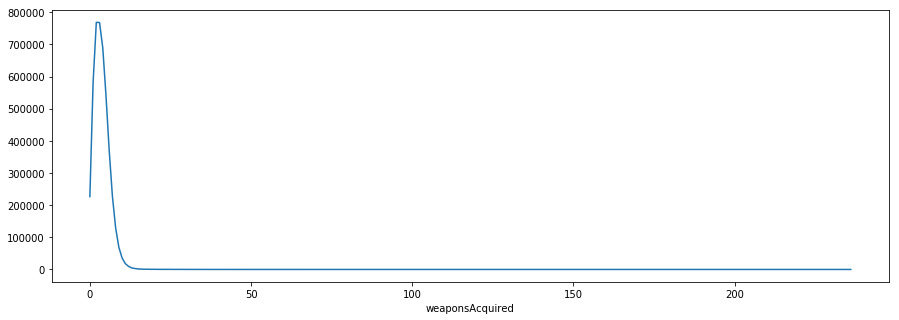

In [150]:
#Choose Ben or Matt = 1 to run that way, set Ben or Matt = 0 to not run
ben=0
matt=1

#Matt's Way of looking at the graphs
listing=[t]
count=0
if matt > 0:
    for col in listing:
        dist=data.groupby(col)[col]
        stuff = dist.count()
        stuff.plot(kind='line', figsize=(15,5))
        count+=1
        plt.show()

#Ben's way of looking at the graphs Enter count >1 if you want to run this
if ben > 0:
    for col in data:
       dist=data.groupby(col)[col]
       stuff = dist.count()
       stuff.plot(kind='line', figsize=(15,5))
       plt.show()

In [151]:
#How many nulls?
data.isnull().any(axis=1).sum()

1

In [152]:
len(data)

4446966

In [153]:
data=data.dropna(axis=0)
len(data)

4446965

In [154]:
data['DBNO-Kills'] = data['DBNOs']-data['kills']
data['kills*kill%'] = data['kills']*data['killPlace']
data['log_longestkill'] = np.log(data.longestKill)

data['vehicle_use'] = 0
data.loc[(data['rideDistance'] > 0),'vehicle_use'] = 1

data['water_use'] = 0
data.loc[(data['swimDistance'] > 0),'water_use'] = 1

data['rotten_team'] = 0
data.loc[(data['teamKills'] > 0),'rotten_team'] = 1

data['weaponsbin']=pd.cut(data['weaponsAcquired'],5,labels=['Low','Two','Three','Four','High'])

data['walkDistance2']=data['walkDistance']**2
vlist=['assists','damageDealt','headshotKills','killPlace','kills','roadKills','DBNO-Kills']
for v in vlist:
    data[v]=data[v]/data['maxPlace']
data['weaponsbin'].head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWa

0    Low
1    Low
2    Low
3    Low
4    Low
Name: weaponsbin, dtype: category
Categories (5, object): [Low < Two < Three < Four < High]

In [155]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'DBNO-Kills',
       'kills*kill%', 'log_longestkill', 'vehicle_use', 'water_use',
       'rotten_team', 'weaponsbin', 'walkDistance2'],
      dtype='object')

In [156]:
droplist=['Id', 'groupId', 'matchId', 'DBNOs', 'killStreaks','numGroups', 'rankPoints', 'rideDistance','swimDistance', 'teamKills', 'vehicleDestroys']
for v in droplist:
    data=data.drop(v , axis=1)
data.columns

Index(['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'revives', 'roadKills', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'DBNO-Kills',
       'kills*kill%', 'log_longestkill', 'vehicle_use', 'water_use',
       'rotten_team', 'weaponsbin', 'walkDistance2'],
      dtype='object')

In [157]:
data['matchType2']=data['matchType'].str.replace('-','')
match_type=[]
for x in data['matchType2'].unique():
    match_type.append(x)
#data['matchType']=data['matchType2']
#data=data.drop('matchType2' , axis=1)
print(match_type)

['squadfpp', 'duo', 'solofpp', 'squad', 'duofpp', 'solo', 'normalsquadfpp', 'crashfpp', 'flaretpp', 'normalsolofpp', 'flarefpp', 'normalduofpp', 'normalduo', 'normalsquad', 'crashtpp', 'normalsolo']


In [158]:
df_list=[]
for m in match_type:
    m=pd.DataFrame(data[data['matchType2']==m]).drop('matchType' , axis=1).drop('matchType2' , axis=1)
    df_list.append(m)
print('done')

done


In [159]:
df_list[1].columns

Index(['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'longestKill', 'matchDuration',
       'maxPlace', 'revives', 'roadKills', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'winPlacePerc', 'DBNO-Kills', 'kills*kill%',
       'log_longestkill', 'vehicle_use', 'water_use', 'rotten_team',
       'weaponsbin', 'walkDistance2'],
      dtype='object')

In [165]:
 # machine learning libraries
from sklearn.ensemble import RandomForestClassifier

AttributeError: type object 'sklearn.tree._tree.TreeBuilder' has no attribute '__reduce_cython__'

In [161]:
random_forest = RandomForestClassifier(n_estimators=115)
for t in range(16):  
    X_train = df_list[t].drop(winPlacePerc, axis=1)
    Y_train = df_list[t]['winPlacePerc']
    random_forest.fit(X_train, Y_train)
    random_forest_train_acc = random_forest.score(X_train, Y_train)
    #random_forest_test_acc = random_forest.score(X_test, Y_test)
    print('random_forest training acuracy= ',random_forest_train_acc)
    #print('random_forest test accuracy= ',random_forest_test_acc)

NameError: name 'RandomForestClassifier' is not defined

In [138]:
len(df_list)

16